In [1]:
import numpy as np
from fair.forward import fair_scm
from fair.RCPs import rcp85
from fair.SSPs import ssp585

from matplotlib import pyplot as plt

import xarray as xr

Text(0.5, 1.0, 'SSP5 8.5')

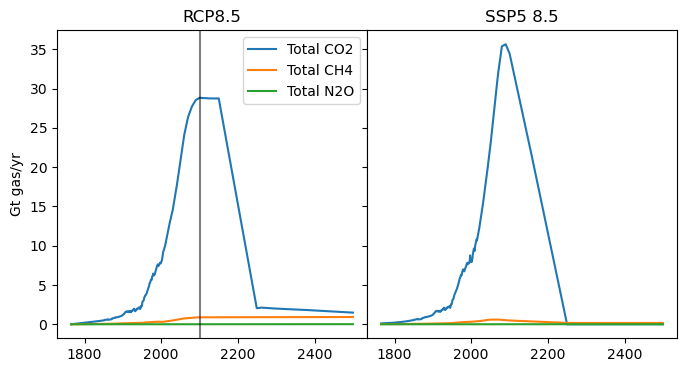

In [2]:
# co2 = co2_fossil + co2_land

f, axes = plt.subplots(1,2, figsize=(8,4), sharey=True)
plt.subplots_adjust(wspace=0)

axes[0].plot(rcp85.Emissions.year, rcp85.Emissions.co2, label = "Total CO2")
axes[0].plot(rcp85.Emissions.year, rcp85.Emissions.ch4/1000, label = "Total CH4")
axes[0].plot(rcp85.Emissions.year, rcp85.Emissions.n2o/1000, label = "Total N2O")
axes[0].legend()
axes[0].set_ylabel("Gt gas/yr")
axes[0].set_title("RCP8.5")

axes[0].axvline(2100, color="k", alpha=0.5)

axes[1].plot(ssp585.Emissions.year, ssp585.Emissions.co2, label = "Total CO2")
axes[1].plot(ssp585.Emissions.year, ssp585.Emissions.ch4/1000, label = "Total CH4")
axes[1].plot(ssp585.Emissions.year, ssp585.Emissions.n2o/1000, label = "Total N2O")
axes[1].set_title("SSP5 8.5")

# plt.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, label = "Fossil CO2")
# plt.plot(rcp85.Emissions.year, rcp85.Emissions.co2_land, label = "Land CO2")
# plt.plot(rcp85.Emissions.co2_land + rcp85.Emissions.co2_fossil)

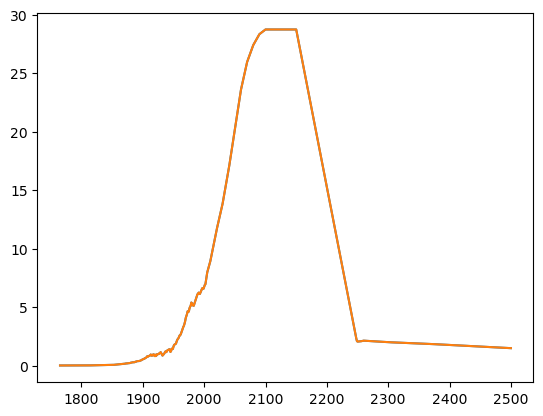

In [3]:
plt.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil)
plt.plot(rcp85.Emissions.year, rcp85.Emissions.emissions[:,1])

In [4]:
C_rcp85, F_rcp85, T_rcp85 = fair_scm(rcp85.Emissions.emissions, useMultigas=True)
C_ssp585, F_ssp585, T_ssp585 = fair_scm(ssp585.Emissions.emissions, useMultigas=True)

C_rcp85_co2, F_rcp85_co2, T_rcp85_co2 = fair_scm(rcp85.Emissions.co2, useMultigas=False)
C_ssp585_co2, F_ssp585_co2, T_ssp585_co2 = fair_scm(ssp585.Emissions.co2, useMultigas=False)

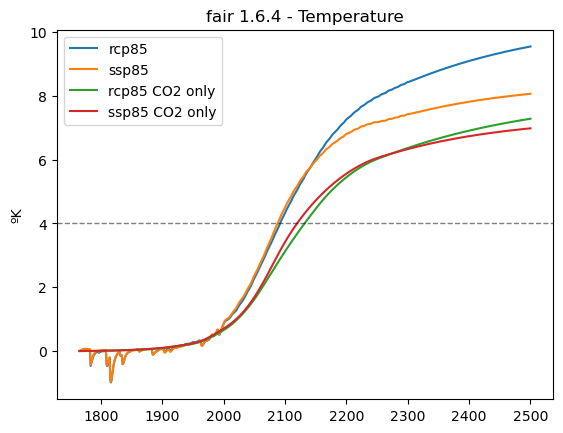

In [5]:
plt.plot(rcp85.Emissions.year, T_rcp85, label="rcp85")
plt.plot(ssp585.Emissions.year, T_ssp585, label="ssp85")

plt.plot(rcp85.Emissions.year, T_rcp85_co2, label="rcp85 CO2 only")
plt.plot(ssp585.Emissions.year, T_ssp585_co2, label="ssp85 CO2 only")

plt.axhline(4, alpha=0.5, linewidth=1, color='k', linestyle="dashed")

# plt.xlim(1750,2100)
plt.title("fair 1.6.4 - Temperature")
plt.ylabel("ºK")
plt.legend()

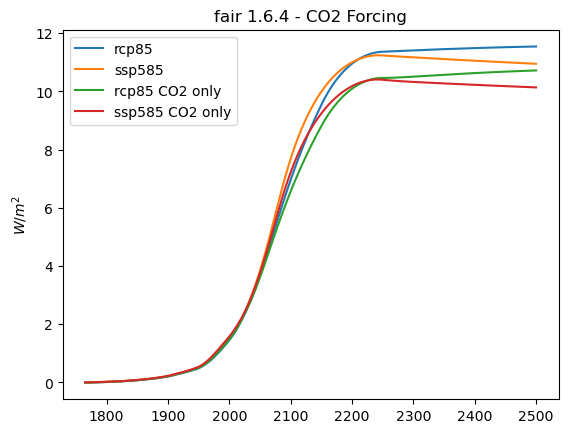

In [6]:
plt.plot(rcp85.Emissions.year, F_rcp85[:,0], label="rcp85")
plt.plot(ssp585.Emissions.year, F_ssp585[:,0], label="ssp585")

plt.plot(rcp85.Emissions.year, F_rcp85_co2, label="rcp85 CO2 only")
plt.plot(ssp585.Emissions.year, F_ssp585_co2, label="ssp585 CO2 only")

plt.title("fair 1.6.4 - CO2 Forcing")
plt.ylabel(r"$W / m^2$")
plt.legend()

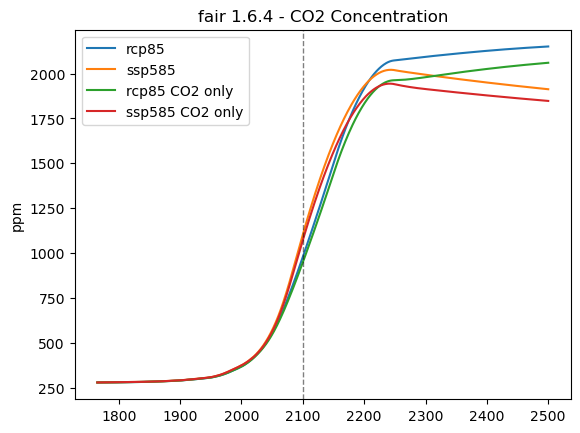

In [7]:
plt.plot(rcp85.Emissions.year, C_rcp85[:,0], label="rcp85")
plt.plot(ssp585.Emissions.year, C_ssp585[:,0], label="ssp585")

plt.plot(rcp85.Emissions.year, C_rcp85_co2, label="rcp85 CO2 only")
plt.plot(ssp585.Emissions.year, C_ssp585_co2, label="ssp585 CO2 only")

plt.axvline(2100, alpha=0.5, linewidth=1, color='k', linestyle="dashed")

plt.title("fair 1.6.4 - CO2 Concentration")
plt.ylabel("ppm")

plt.legend()

In [8]:
np.save("ssp585_emissions.npy", ssp585.Emissions.emissions)
np.save("rcp85_emissions.npy", rcp85.Emissions.emissions)

np.save("T_ssp585_fair_1.npy", T_ssp585_co2)
np.save("T_rcp85_fair_1.npy", T_rcp85_co2)

np.save("F_ssp585_fair_1.npy", F_ssp585_co2)
np.save("F_rcp85_fair_1.npy", F_rcp85_co2)

np.save("C_ssp585_fair_1.npy", C_ssp585_co2)
np.save("C_rcp85_fair_1.npy", C_rcp85_co2)